In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
data=pd.read_csv('us-counties.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176735 entries, 0 to 176734
Data columns (total 6 columns):
date      176735 non-null object
county    176735 non-null object
state     176735 non-null object
fips      174794 non-null float64
cases     176735 non-null int64
deaths    176735 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 8.1+ MB


In [3]:
data.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
MD_data=data[data.state=='Maryland']
MD_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1693 entries, 555 to 174942
Data columns (total 6 columns):
date      1693 non-null object
county    1693 non-null object
state     1693 non-null object
fips      1652 non-null float64
cases     1693 non-null int64
deaths    1693 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 92.6+ KB


In [5]:
MD_data.county.unique()

array(['Montgomery', 'Harford', "Prince George's", 'Baltimore',
       'Anne Arundel', 'Charles', 'Carroll', 'Baltimore city', 'Howard',
       'Frederick', 'Talbot', 'Calvert', 'Wicomico', 'Worcester',
       'Caroline', 'Somerset', 'Washington', 'Cecil', "St. Mary's",
       'Garrett', "Queen Anne's", 'Kent', 'Dorchester', 'Allegany',
       'Unknown'], dtype=object)

In [6]:
MD_agg_data=MD_data.groupby(['date']).sum().reset_index()
MD_agg_data.head(15)

,date,fips,cases,deaths
0,2020-03-05,24031.0,3,0
1,2020-03-06,24031.0,3,0
2,2020-03-07,24031.0,3,0
3,2020-03-08,48056.0,5,0
4,2020-03-09,72089.0,6,0
5,2020-03-10,72089.0,9,0
6,2020-03-11,96094.0,13,0
7,2020-03-12,96094.0,13,0
8,2020-03-13,144114.0,18,0
9,2020-03-14,168127.0,27,0


In [7]:
Balt_city_data=MD_data[MD_data.county=='Baltimore city'].reset_index().drop(columns=['index'], axis=0)
Balt_city_data.index+=10
Balt_county_data=MD_data[MD_data.county=='Baltimore'].reset_index().drop(columns=['index'], axis=0)
Balt_county_data.index+=6

In [8]:
Balt_city_data.head()

,date,county,state,fips,cases,deaths
10,2020-03-15,Baltimore city,Maryland,24510.0,1,0
11,2020-03-16,Baltimore city,Maryland,24510.0,1,0
12,2020-03-17,Baltimore city,Maryland,24510.0,3,0
13,2020-03-18,Baltimore city,Maryland,24510.0,7,0
14,2020-03-19,Baltimore city,Maryland,24510.0,7,0


In [9]:
Balt_county_data.head()

,date,county,state,fips,cases,deaths
6,2020-03-11,Baltimore,Maryland,24005.0,1,0
7,2020-03-12,Baltimore,Maryland,24005.0,1,0
8,2020-03-13,Baltimore,Maryland,24005.0,2,0
9,2020-03-14,Baltimore,Maryland,24005.0,3,0
10,2020-03-15,Baltimore,Maryland,24005.0,3,0


In [10]:
MD_agg_data.loc[Balt_city_data.index]

,date,fips,cases,deaths
10,2020-03-15,216664.0,32,0
11,2020-03-16,264726.0,39,0
12,2020-03-17,264726.0,57,0
13,2020-03-18,264726.0,85,1
14,2020-03-19,312780.0,108,1
...,...,...,...,...
77,2020-05-21,577079.0,43645,2159
78,2020-05-22,577079.0,44539,2207
79,2020-05-23,577079.0,45608,2243
80,2020-05-24,577079.0,46919,2277


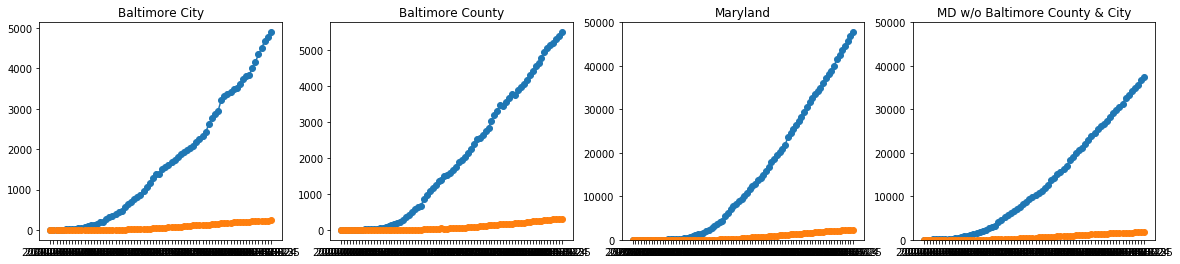

In [11]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.plot(Balt_city_data.date, Balt_city_data.cases, marker='o')
plt.plot(Balt_city_data.date, Balt_city_data.deaths, marker='o')
plt.title('Baltimore City')
plt.xlabel('')
plt.subplot(1,4,2)
plt.plot(Balt_county_data.date, Balt_county_data.cases, marker='o')
plt.plot(Balt_county_data.date, Balt_county_data.deaths, marker='o')
plt.title('Baltimore County')
plt.xlabel('')
plt.subplot(1,4,3)
plt.plot(MD_agg_data.date, MD_agg_data.cases, marker='o')
plt.plot(MD_agg_data.date, MD_agg_data.deaths, marker='o')
plt.title('Maryland')
plt.xlabel('')
plt.ylim([0,50000])
plt.subplot(1,4,4)
plt.plot(Balt_city_data.date, MD_agg_data.loc[Balt_city_data.index].cases-
                              Balt_county_data.loc[Balt_city_data.index].cases-
                              Balt_city_data.cases, marker='o')
plt.plot(Balt_city_data.date, MD_agg_data.loc[Balt_city_data.index].deaths-
                              Balt_county_data.loc[Balt_city_data.index].deaths-
                              Balt_city_data.deaths, marker='o')
plt.title('MD w/o Baltimore County & City')
plt.xlabel('')
plt.ylim([0,50000])
plt.show()

In [12]:
print(list(Balt_city_data.cases)[-1]/len(Balt_city_data.cases)/620000*100000),
      

10.969982078853047


(None,)

In [13]:
len(list(Balt_city_data.index)[:-3])

69

C:\Users\Mark\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


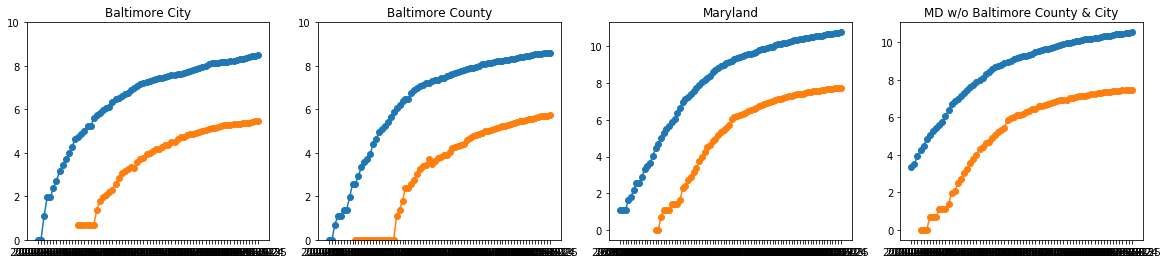

In [14]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.plot(Balt_city_data.date, np.log(Balt_city_data.cases), marker='o')
plt.plot(Balt_city_data.date, np.log(Balt_city_data.deaths), marker='o')
plt.title('Baltimore City')
plt.xlabel('')
plt.ylim([0,10])
plt.subplot(1,4,2)
plt.plot(Balt_county_data.date, np.log(Balt_county_data.cases), marker='o')
plt.plot(Balt_county_data.date, np.log(Balt_county_data.deaths), marker='o')
plt.title('Baltimore County')
plt.xlabel('')
plt.ylim([0,10])
plt.subplot(1,4,3)
plt.plot(MD_agg_data.date, np.log(MD_agg_data.cases), marker='o')
plt.plot(MD_agg_data.date, np.log(MD_agg_data.deaths), marker='o')
plt.title('Maryland')
plt.xlabel('')
plt.subplot(1,4,4)
plt.plot(Balt_city_data.date, np.log(MD_agg_data.loc[Balt_city_data.index].cases-
                              Balt_county_data.loc[Balt_city_data.index].cases-
                              Balt_city_data.cases), marker='o')
plt.plot(Balt_city_data.date, np.log(MD_agg_data.loc[Balt_city_data.index].deaths-
                              Balt_county_data.loc[Balt_city_data.index].deaths-
                              Balt_city_data.deaths), marker='o')
plt.title('MD w/o Baltimore County & City')
plt.xlabel('')
plt.show()

Let's investigate the SIR model and try to fit this to our current population.

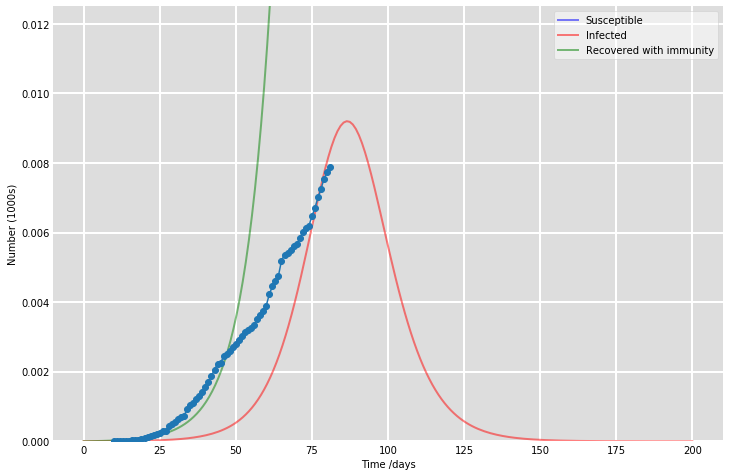

In [15]:
#Code from: https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

# Total population, N. (Baltimore City)
N = 620000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.88, 1/1.31
# A grid of time points (in days)
t = np.linspace(0, 200, 200)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(12,8))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(Balt_city_data.index, Balt_city_data.cases/N, marker='o')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(loc='best')
legend.get_frame().set_alpha(0.5)
plt.ylim([0,0.0125])
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Back to the daily cases. Let's create abother Baltimore City dataframe, but add on the daily cases.

In [16]:
def get_daily(df):
    #Take your dataframe and append the column of the daily growth.
    df2 = df.append(pd.Series(0, index=df.columns), ignore_index=True).shift()
    df2.cases[0]=0
    df2.deaths[0]=0
    df2.drop(df2.tail(1).index,inplace=True)
    df2.index+=(df.index[-1]-len(df))+1
#     print(df.index[-1]-len(df))
    df['daily']=(df.cases-df2.cases)
    return df

In [17]:
import matplotlib.dates as mdates
import datetime

def plot_daily(df, county=True):
    #Given a dataframe, plot the daily increase.
    df['SM14']=df.daily.rolling(window=14).mean()
    a,b=np.polyfit(df.index,df.daily,deg=1)
    plt.figure(figsize=(12,10))
    plt.plot(df.date, df.daily, marker='.', label='daily')
    plt.plot(df.date, np.ones(len(df))*df.daily.mean(), label='total avg')
    plt.plot(df.date, df.index*a+b, label='trend')
    plt.plot(df.date, df.SM14, label='SM14')
    plt.legend(loc='best')
    plt.xticks(rotation='vertical', fontsize=8)
    plt.ylim([0,max(df.daily)*1.05])
    if county==True:
        plt.title(str(df.county.unique())+', '+str(df.state.unique()))
    else:
        plt.title(str(df.state.unique()))
    plt.show()

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


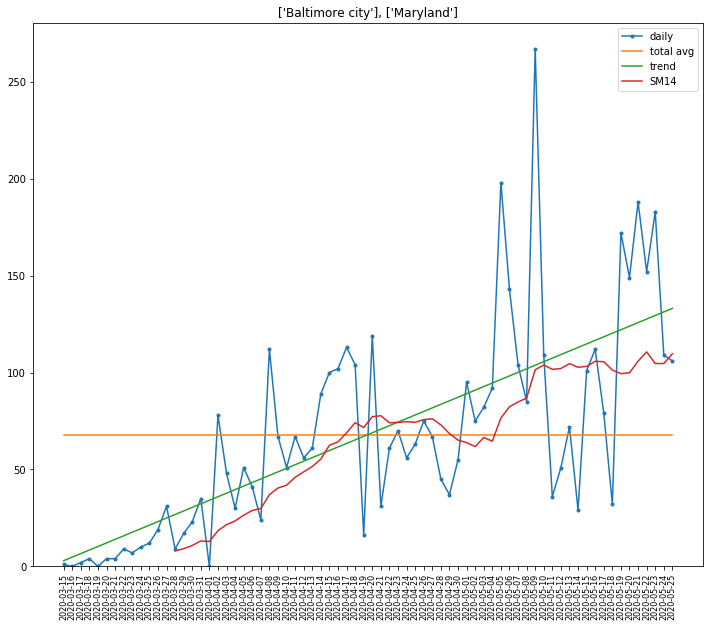

In [18]:
get_daily(Balt_city_data)
plot_daily(Balt_city_data)

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


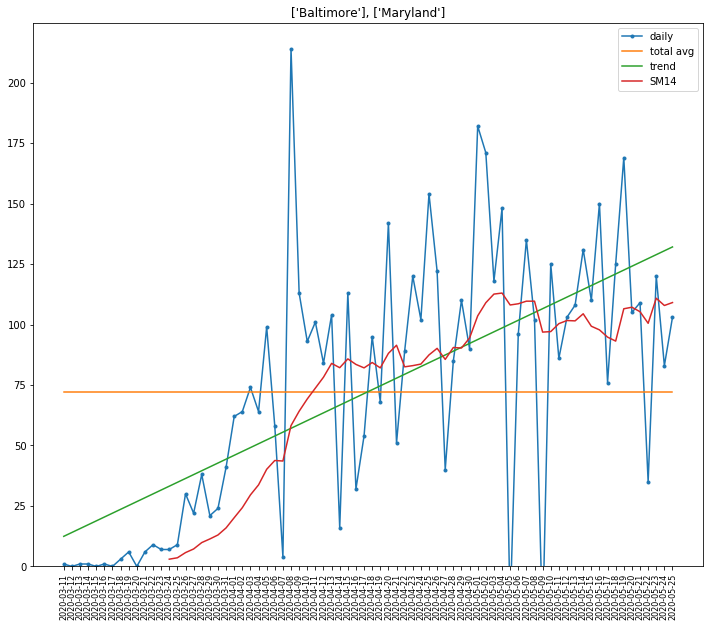

In [19]:
get_daily(Balt_county_data)
plot_daily(Balt_county_data)

In [20]:
Balt_county_data.tail(16)

,date,county,state,fips,cases,deaths,daily,SM14
66,2020-05-10,Baltimore,Maryland,24005.0,3878,191,125.0,97.071429
67,2020-05-11,Baltimore,Maryland,24005.0,3964,194,86.0,100.357143
68,2020-05-12,Baltimore,Maryland,24005.0,4067,204,103.0,101.642857
69,2020-05-13,Baltimore,Maryland,24005.0,4175,218,108.0,101.500000
70,2020-05-14,Baltimore,Maryland,24005.0,4306,223,131.0,104.428571
71,2020-05-15,Baltimore,Maryland,24005.0,4416,234,110.0,99.285714
72,2020-05-16,Baltimore,Maryland,24005.0,4566,240,150.0,97.785714
73,2020-05-17,Baltimore,Maryland,24005.0,4642,250,76.0,94.785714
74,2020-05-18,Baltimore,Maryland,24005.0,4767,255,125.0,93.142857
75,2020-05-19,Baltimore,Maryland,24005.0,4936,263,169.0,106.500000


In [22]:
def get_state(df,state_name='Maryland'):
    state_df=df[df.state==state_name].reset_index().drop(columns=['index'], axis=0)
    return state_df


def get_state_agg(df,state_name):
    agg_df=df.groupby(['date']).sum()
    agg_df['state']=state_name
    return agg_df

def get_county(df,county_name='Baltimore city'):
    county_df=df[df.county==county_name].reset_index().drop(columns=['index'], axis=0)
    return county_df

def get_this(df,state_name='Maryland', county=False, county_name='Baltimore city'):
    if county==False:
        df_out=get_state_agg(get_state(df,state_name), state_name).reset_index()
    if county==True:
        df_out=county_df=get_county(get_state(df,state_name), county_name)
    return df_out


C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


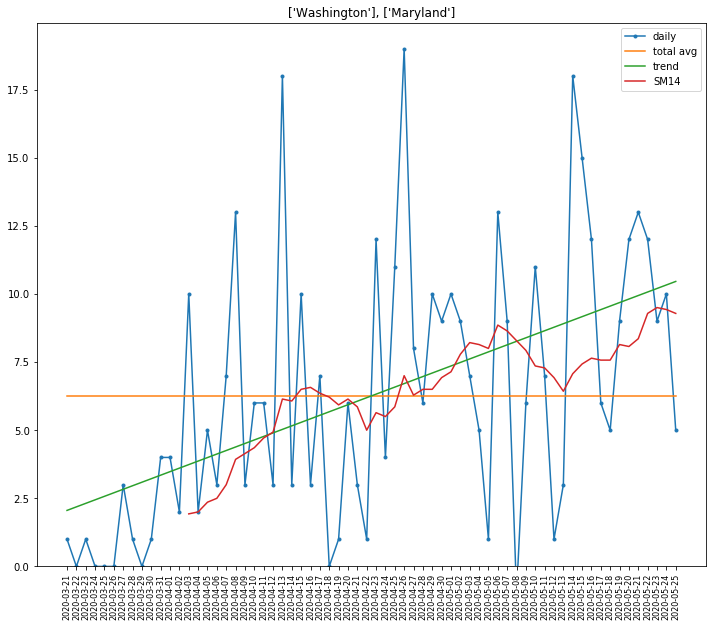

In [23]:
Wash_Co=get_this(data,state_name='Maryland', county=True, county_name='Washington')
get_daily(Wash_Co)
plot_daily(Wash_Co)

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


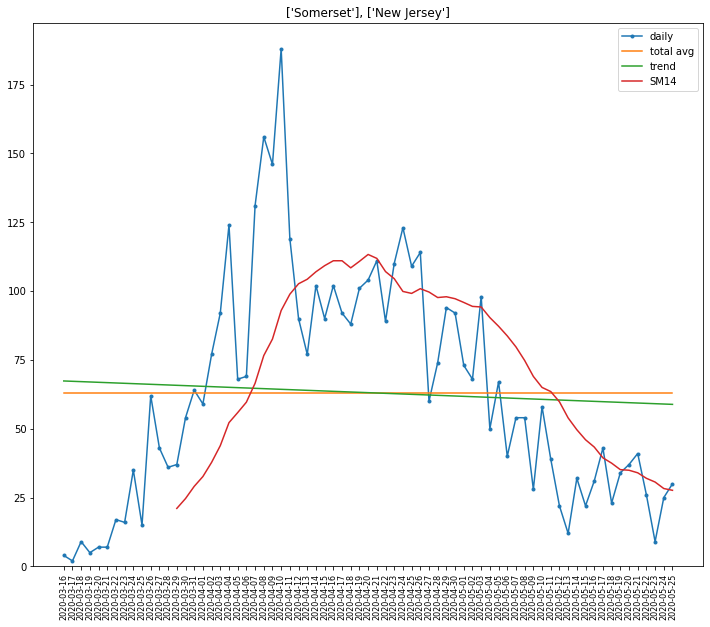

In [24]:
Bedmin=get_this(data,state_name='New Jersey', county=True, county_name='Somerset')
get_daily(Bedmin)
plot_daily(Bedmin)

In [25]:
Bedmin.tail(14)

,date,county,state,fips,cases,deaths,daily,SM14
57,2020-05-12,Somerset,New Jersey,34035.0,4115,339,22.0,59.785714
58,2020-05-13,Somerset,New Jersey,34035.0,4127,340,12.0,53.928571
59,2020-05-14,Somerset,New Jersey,34035.0,4159,348,32.0,49.642857
60,2020-05-15,Somerset,New Jersey,34035.0,4181,359,22.0,46.000000
61,2020-05-16,Somerset,New Jersey,34035.0,4212,363,31.0,43.357143
62,2020-05-17,Somerset,New Jersey,34035.0,4255,375,43.0,39.428571
63,2020-05-18,Somerset,New Jersey,34035.0,4278,375,23.0,37.500000
64,2020-05-19,Somerset,New Jersey,34035.0,4312,382,34.0,35.142857
65,2020-05-20,Somerset,New Jersey,34035.0,4349,384,37.0,34.928571
66,2020-05-21,Somerset,New Jersey,34035.0,4390,387,41.0,34.000000


C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


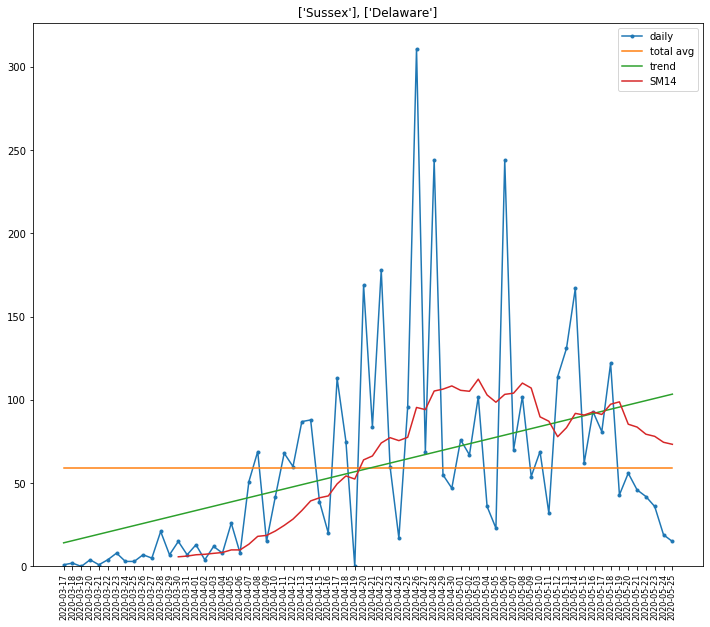

In [26]:
plot_daily(get_daily(get_this(data,state_name='Delaware', county=True, county_name='Sussex')))

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


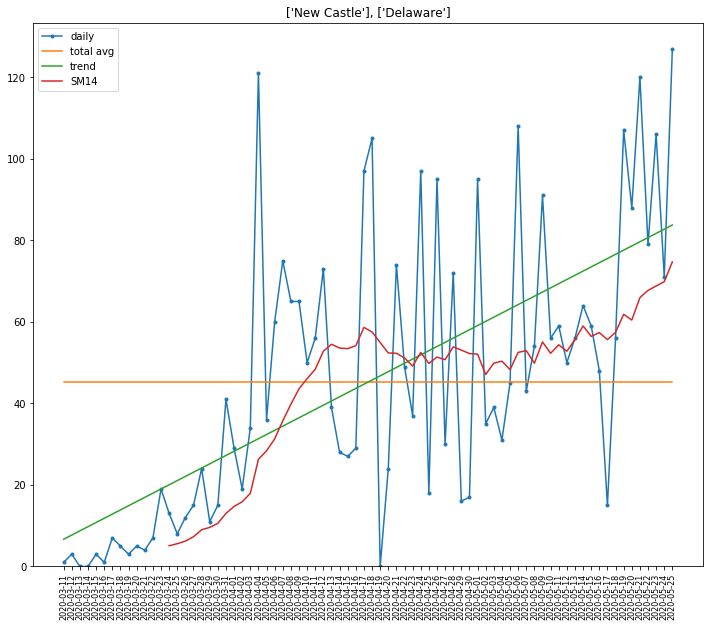

In [27]:
plot_daily(get_daily(get_this(data,state_name='Delaware', county=True, county_name='New Castle')))

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


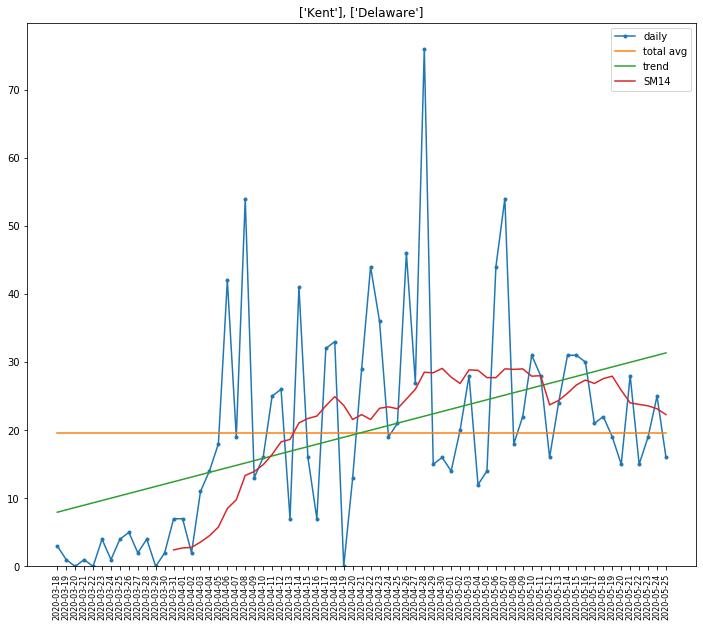

In [28]:
plot_daily(get_daily(get_this(data,state_name='Delaware', county=True, county_name='Kent')))

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


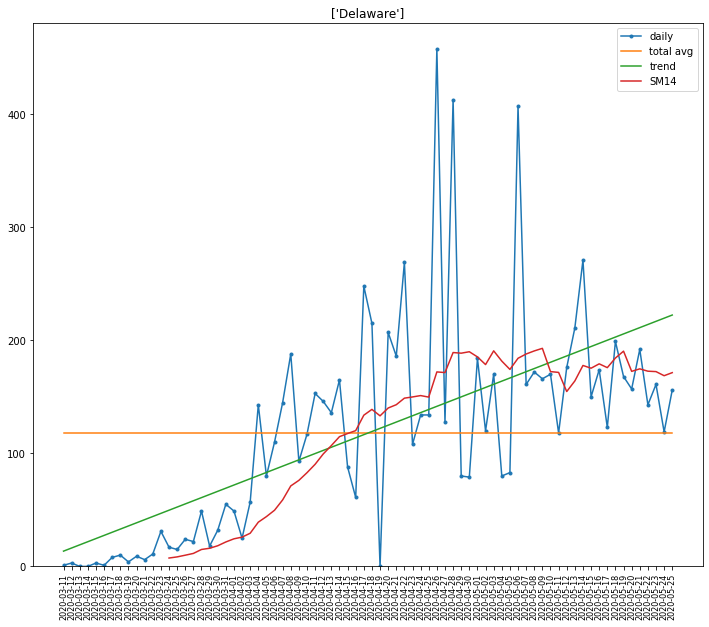

In [29]:
plot_daily(get_daily(get_this(data,state_name='Delaware', county=False)),county=False)

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


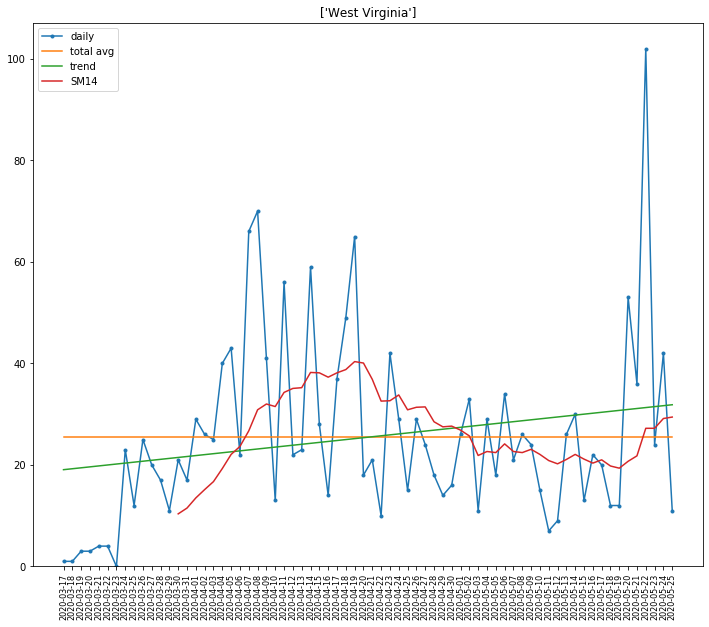

In [30]:
plot_daily(get_daily(get_this(data,state_name='West Virginia', county=False)),county=False)

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


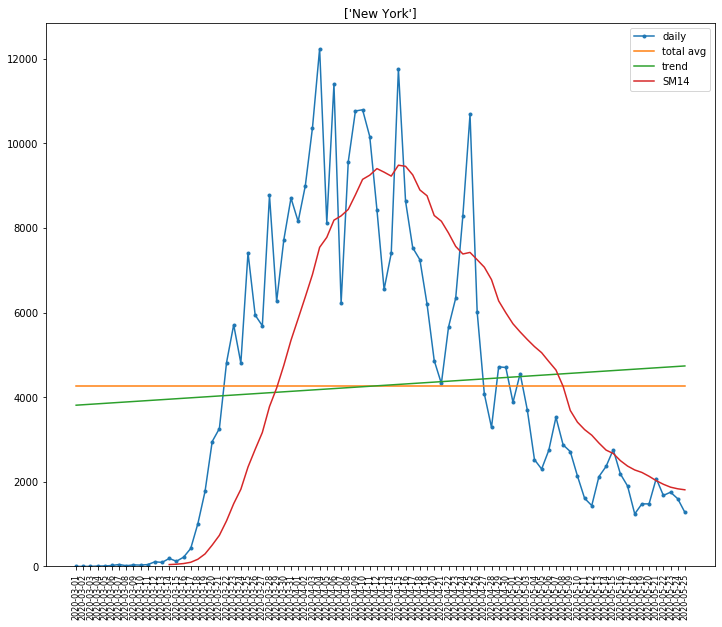

In [31]:
plot_daily(get_daily(get_this(data,state_name='New York', county=False)),county=False)

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<Figure size 576x288 with 0 Axes>

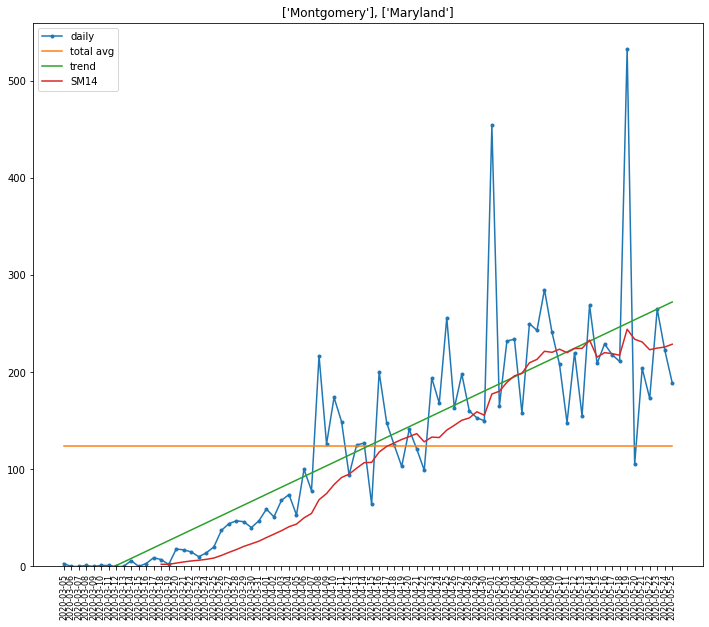

<Figure size 576x288 with 0 Axes>

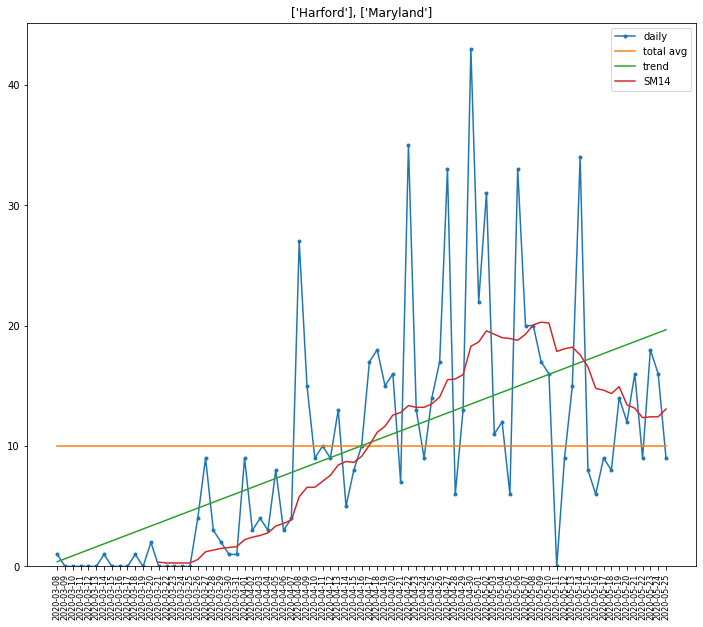

<Figure size 576x288 with 0 Axes>

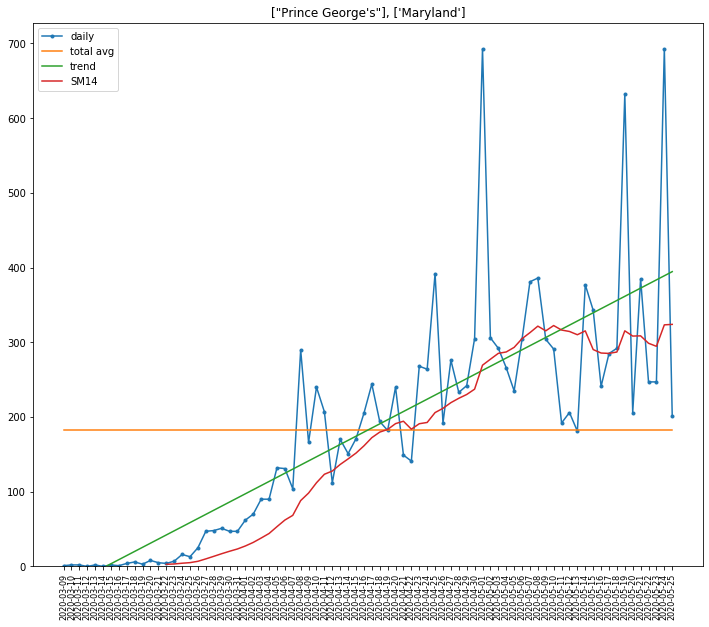

<Figure size 576x288 with 0 Axes>

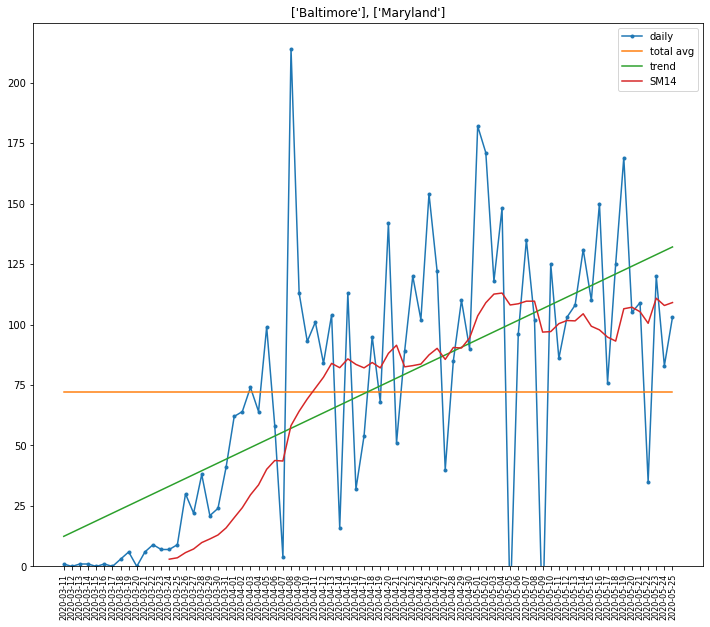

<Figure size 576x288 with 0 Axes>

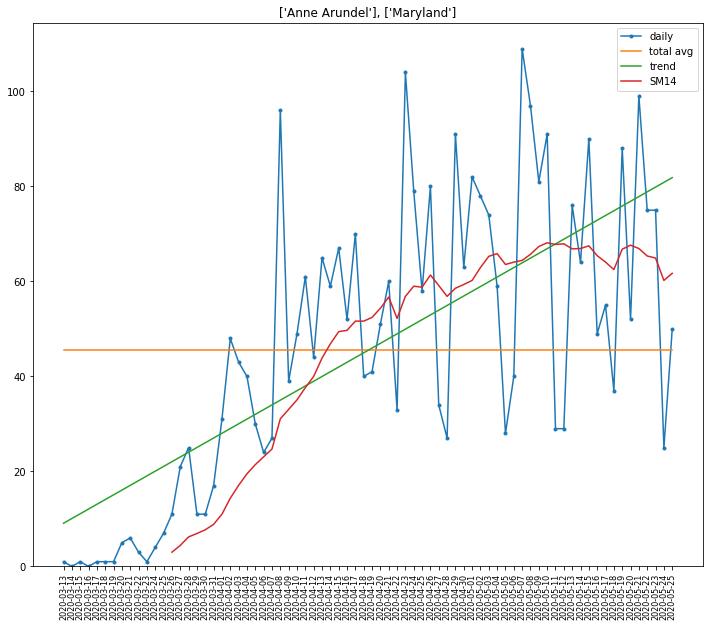

<Figure size 576x288 with 0 Axes>

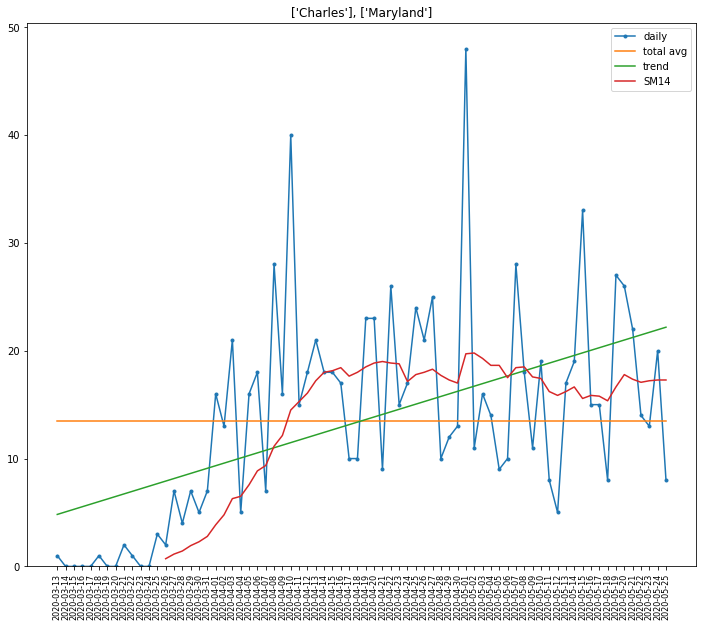

<Figure size 576x288 with 0 Axes>

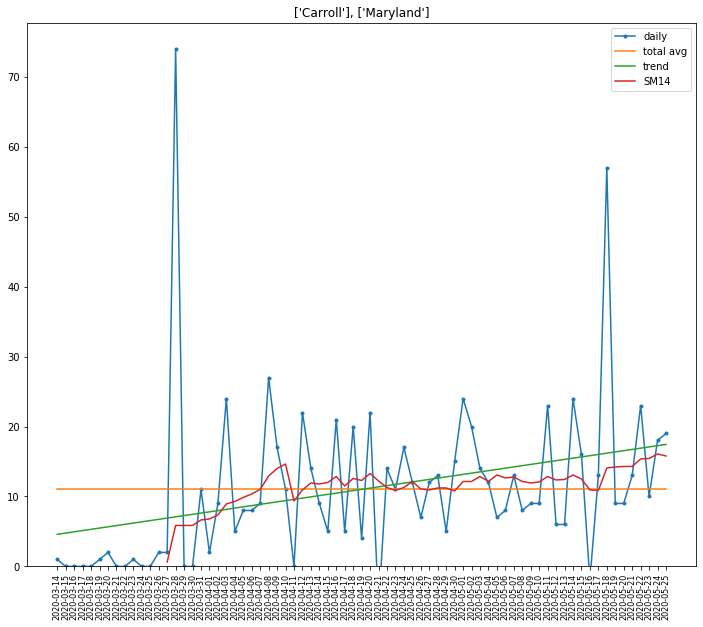

<Figure size 576x288 with 0 Axes>

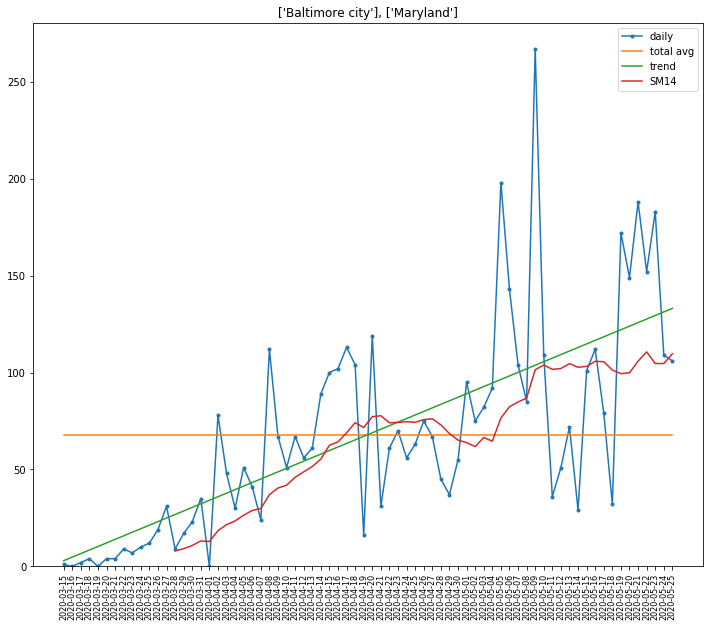

<Figure size 576x288 with 0 Axes>

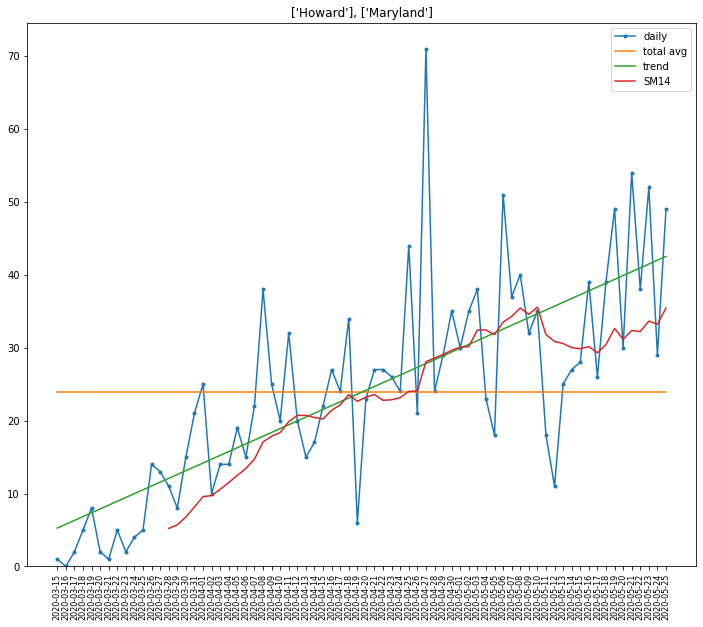

<Figure size 576x288 with 0 Axes>

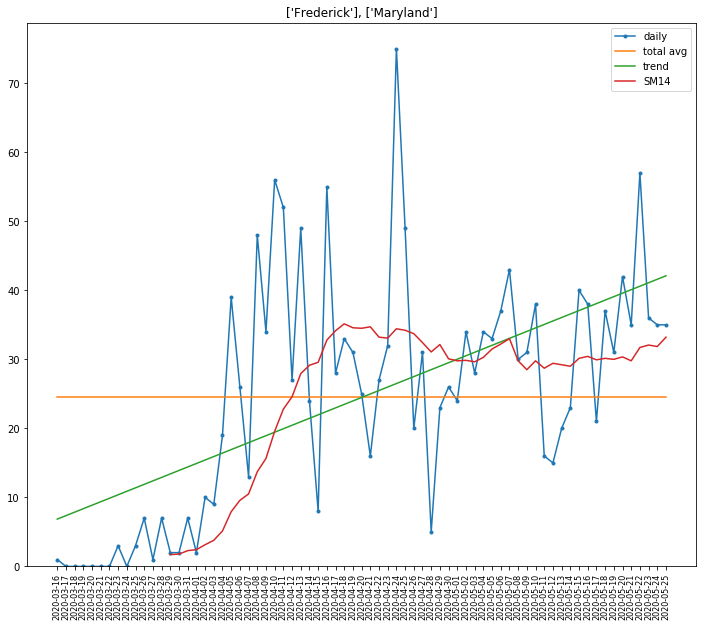

<Figure size 576x288 with 0 Axes>

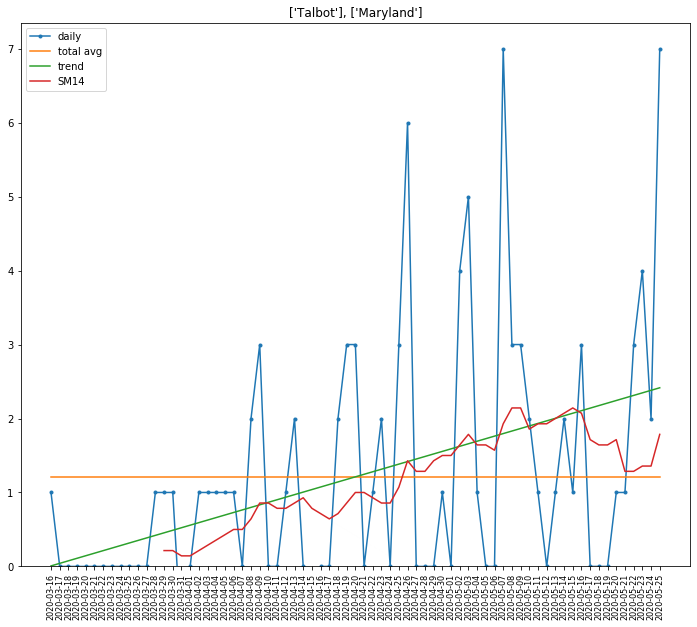

<Figure size 576x288 with 0 Axes>

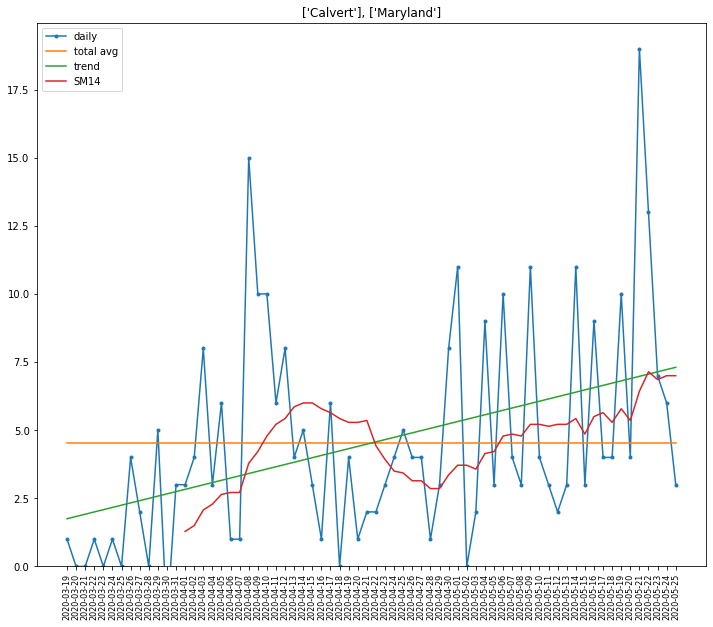

<Figure size 576x288 with 0 Axes>

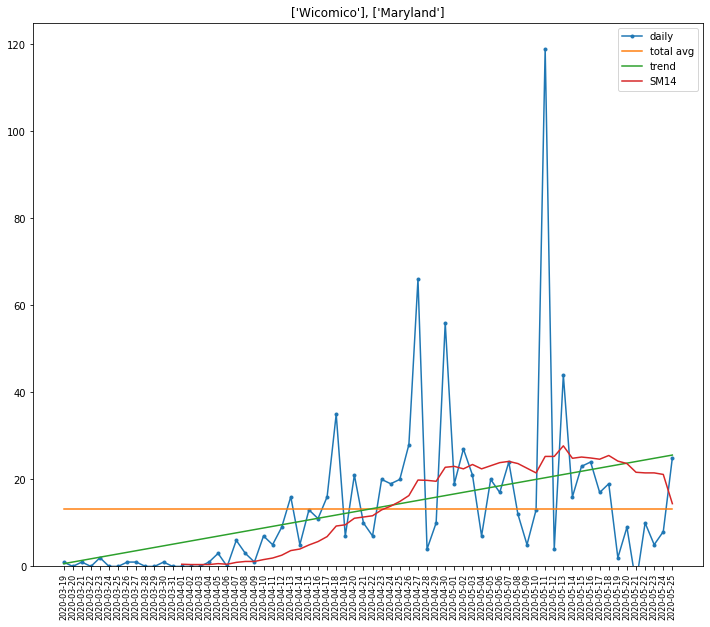

<Figure size 576x288 with 0 Axes>

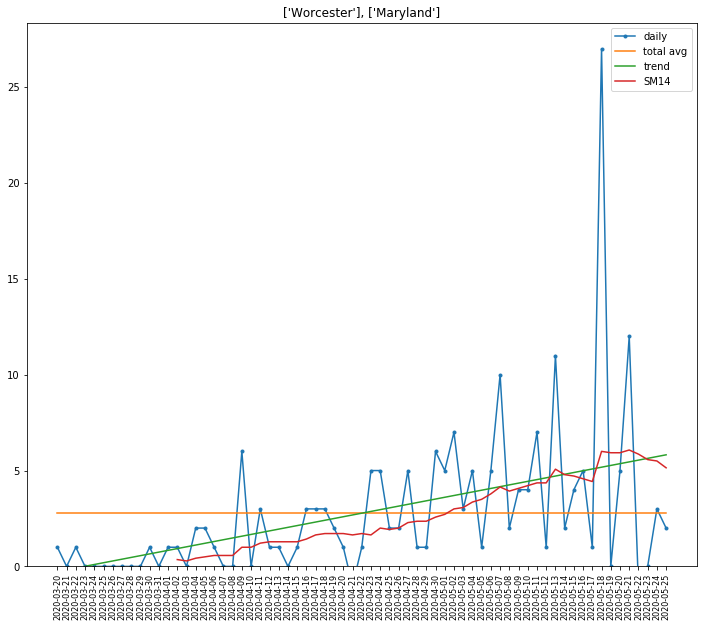

<Figure size 576x288 with 0 Axes>

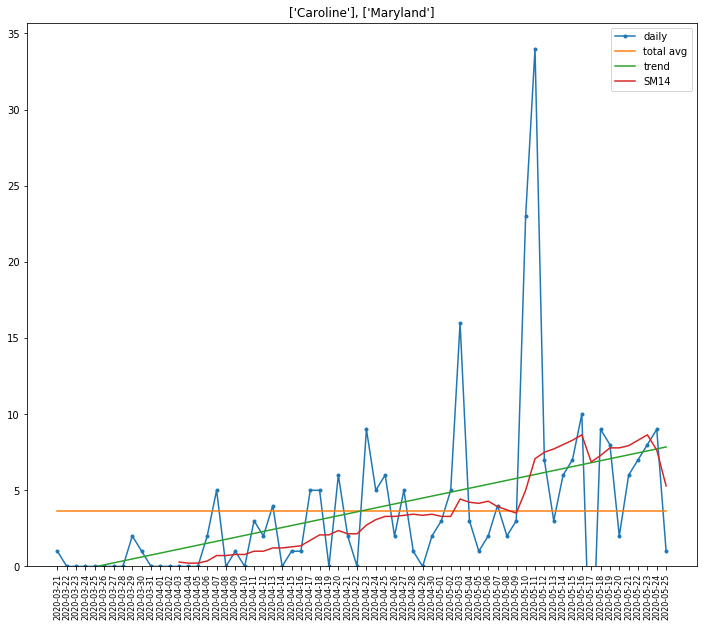

<Figure size 576x288 with 0 Axes>

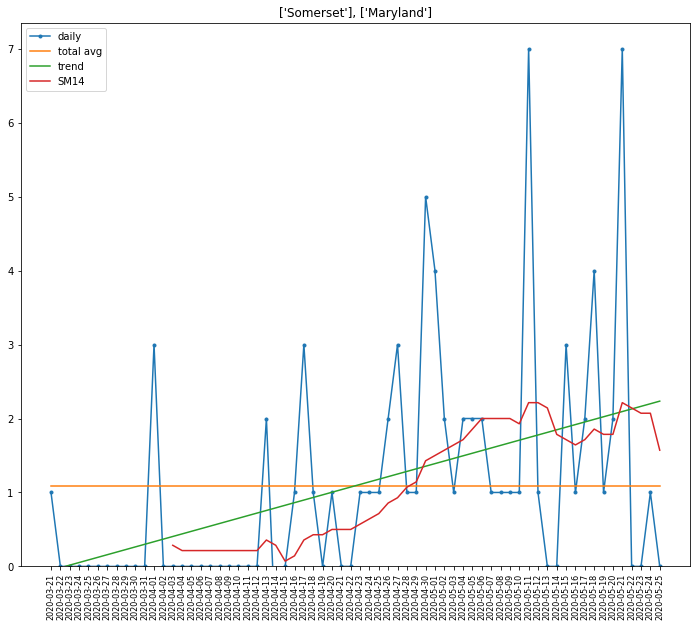

<Figure size 576x288 with 0 Axes>

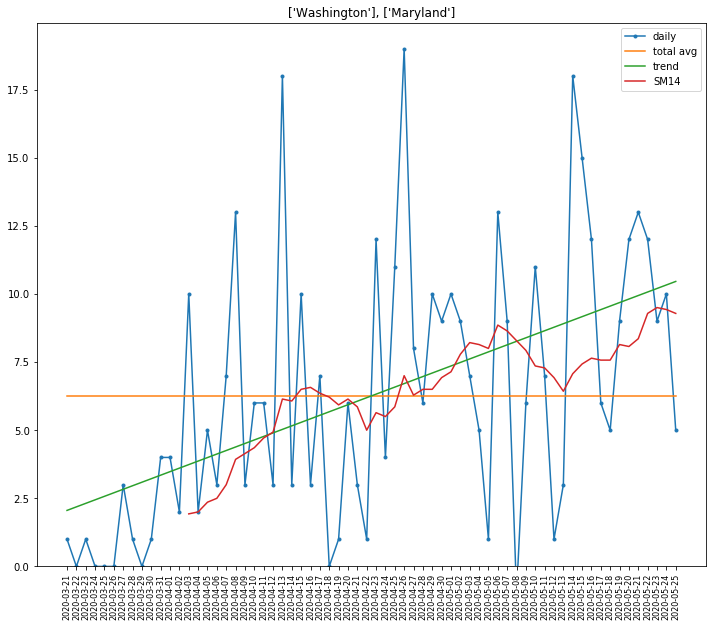

<Figure size 576x288 with 0 Axes>

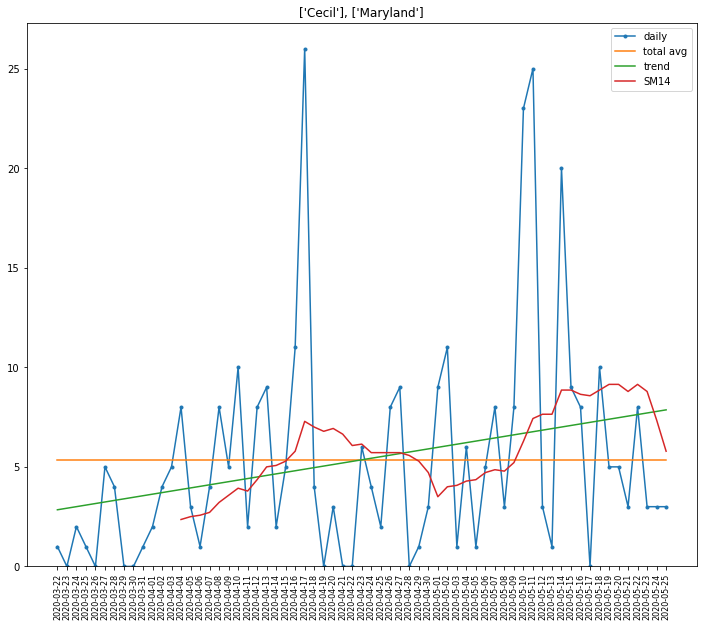

<Figure size 576x288 with 0 Axes>

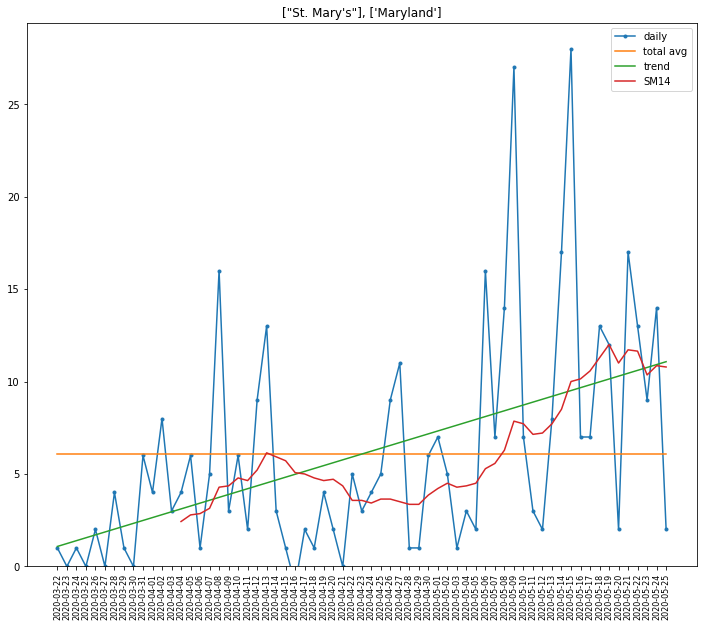

<Figure size 576x288 with 0 Axes>

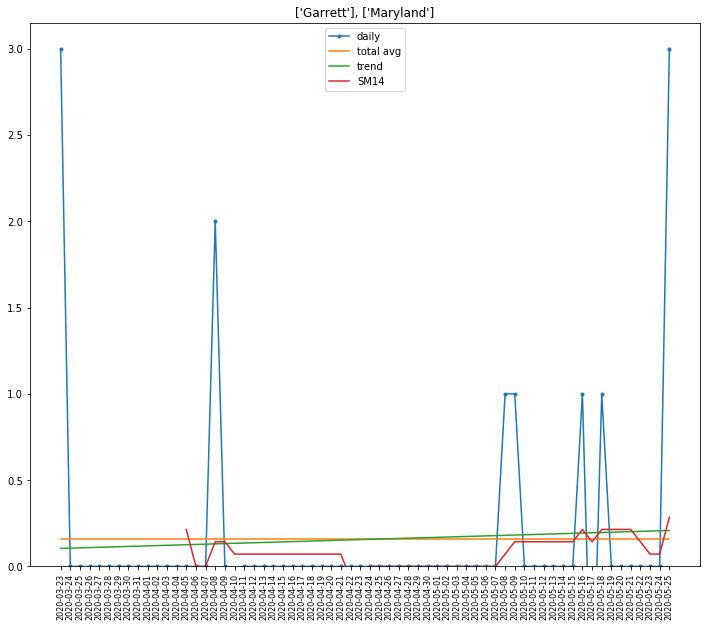

<Figure size 576x288 with 0 Axes>

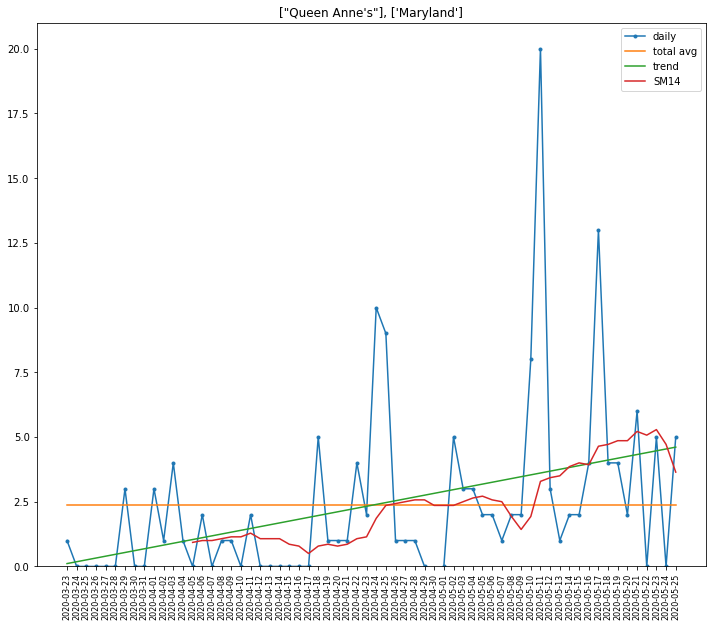

<Figure size 576x288 with 0 Axes>

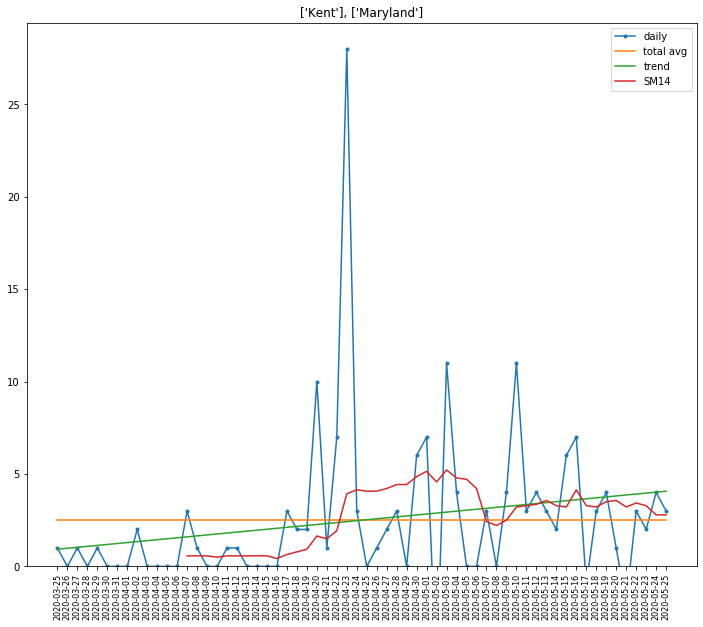

<Figure size 576x288 with 0 Axes>

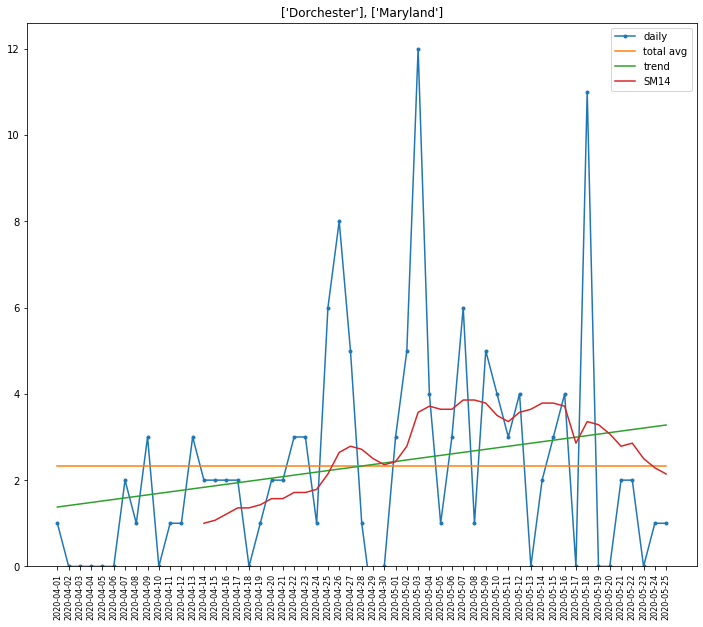

<Figure size 576x288 with 0 Axes>

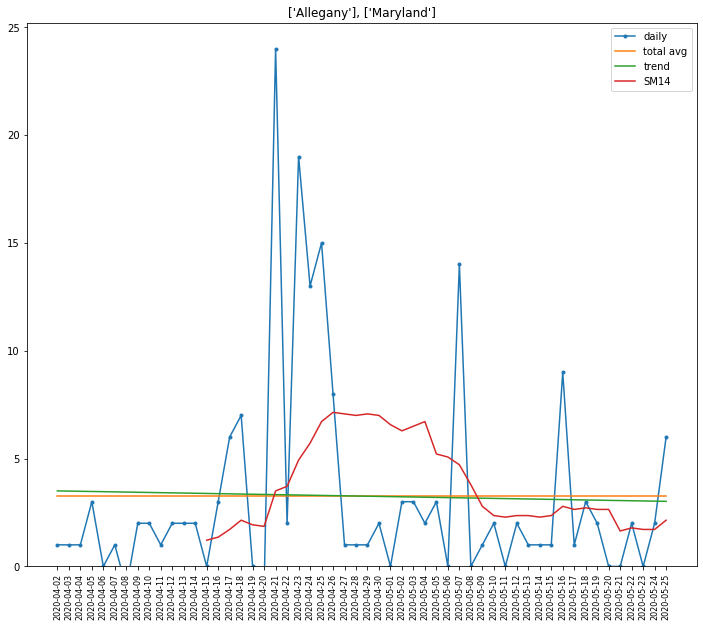

<Figure size 576x288 with 0 Axes>

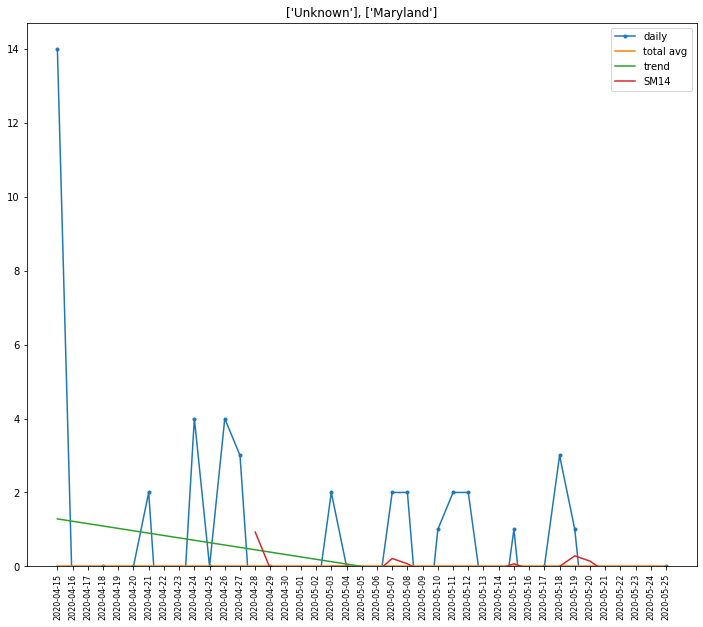

In [32]:
#Plot all of the MD County data
for i in range(len(MD_data.county.unique())):
    plt.figure(figsize=(8,4))
    plot_daily(get_daily(get_this(data,state_name='Maryland', county=True, county_name=MD_data.county.unique()[i])))

In [33]:
def plot_total_cases(df):
    plt.bar(df.date,df.cases)

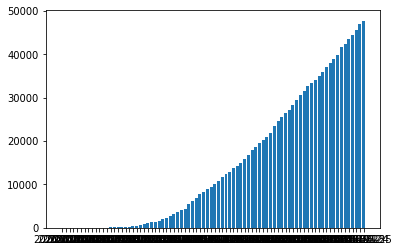

In [34]:
plot_total_cases(get_this(data,state_name='Maryland', county=False))

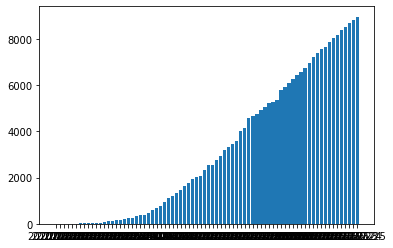

In [35]:
plot_total_cases(get_this(data,state_name='Delaware', county=False))

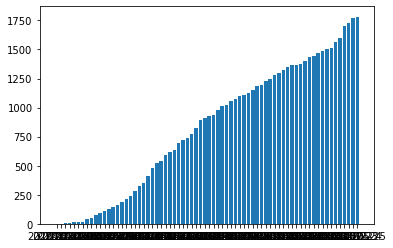

In [36]:
plot_total_cases(get_this(data,state_name='West Virginia', county=False))

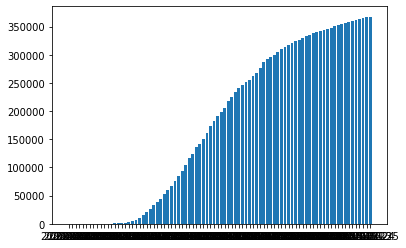

In [37]:
plot_total_cases(get_this(data,state_name='New York', county=False))

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


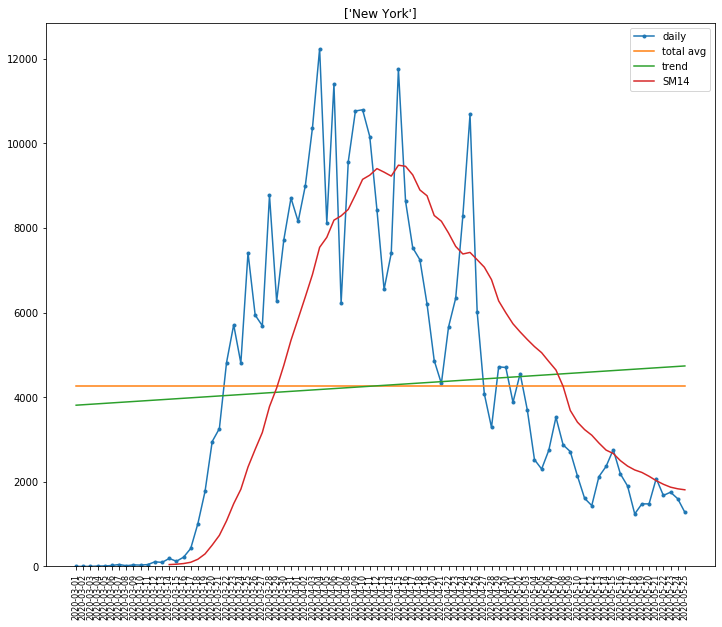

In [38]:
plot_daily(get_daily(get_this(data,state_name='New York', county=False)),county=False)

We can experiment with some moving averages to see 

In [39]:
Balt_city_data['SM3']=Balt_city_data.daily.rolling(window=7).mean()
Balt_city_data['SM5']=Balt_city_data.daily.rolling(window=14).mean()
Balt_city_data['EMA'] = Balt_city_data.daily.ewm(span=7,adjust=False).mean()
BCD=Balt_city_data

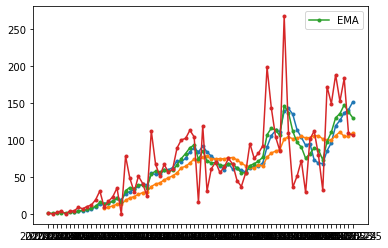

In [40]:
plt.plot(BCD.date,BCD.SM3, marker='.')
plt.plot(BCD.date,BCD.SM5, marker='.')
plt.plot(BCD.date,BCD.EMA, marker='.', label='EMA')
plt.plot(BCD.date,BCD.daily, marker='.')
plt.legend(loc='best')
plt.show()

In [41]:
def get_open_score(df):
    #Get a linear slope of the previous 2 weeks
    a,b=np.polyfit(df.index[-14:],df.daily[-14:],deg=1)
    return a


In [42]:
get_open_score(get_daily(get_this(data,state_name='New York', county=False)))

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


-49.30109890109905

In [43]:
get_open_score(get_daily(get_this(data,state_name='Maryland', county=False)))

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


18.07252747252747

In [53]:
score_dct={}
for i in range(len(data.state.unique())):
    score_dct[data.state.unique()[i]]=get_open_score(get_daily(get_this(data,
                                    state_name=data.state.unique()[i], county=False)))
minscore=min(score_dct.values())
for i in range(len(data.state.unique())):
    score_dct[data.state.unique()[i]]-=minscore
maxscore=max(score_dct.values())
for i in range(len(data.state.unique())):
    score_dct[data.state.unique()[i]]/=maxscore

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [1]:
plt.figure(figsize=(12,8))
plt.bar(score_dct.keys(),score_dct.values())
plt.plot(list(score_dct.keys()),np.ones(55)*np.mean(list(score_dct.values())), label='avg')
plt.plot(list(score_dct.keys()),np.ones(55)*0.5, label='decision')
plt.legend(loc='best')
print(np.mean(list(score_dct.values())))
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'plt' is not defined

In [54]:
len(score_dct.keys())

55

In [55]:
def plot_daily_quad(df, county=True):
    #Given a dataframe, plot the daily increase.
    df['SM14']=df.daily.rolling(window=14).mean()
    a,b,c=np.polyfit(df.index,df.daily,deg=2)
    print(a,b,c)
    plt.figure(figsize=(12,6))
    plt.plot(df.date, df.daily, marker='.', label='daily')
    plt.plot(df.date, np.ones(len(df))*df.daily.mean(), label='total avg')
    plt.plot(df.date, (df.index**2)*a+df.index*b+c, label='trend')
    plt.plot(df.date, df.SM14, label='SM14')
    plt.legend(loc='best')
    if county==True:
        plt.title(str(df.county.unique())+', '+str(df.state.unique()))
    else:
        plt.title(str(df.state.unique()))
    plt.show()

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


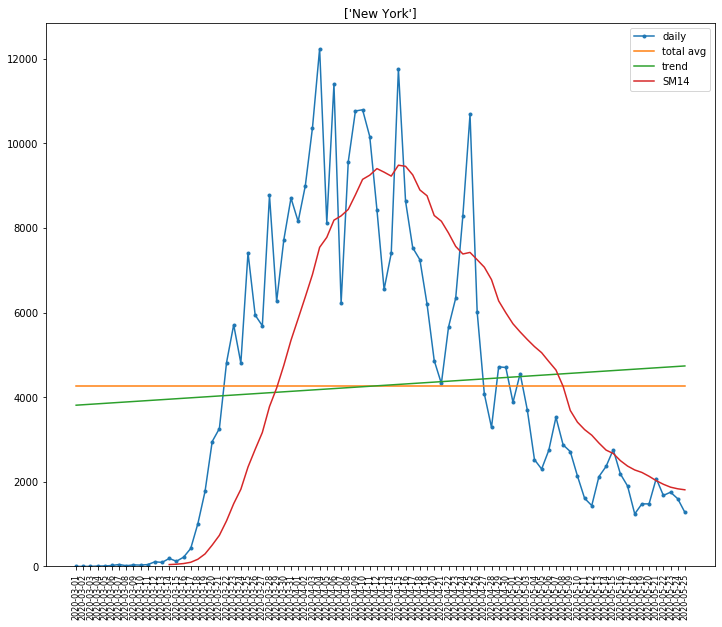

0        1.0
1        0.0
2        1.0
3        9.0
4       11.0
       ...  
81    2078.0
82    1678.0
83    1754.0
84    1601.0
85    1279.0
Name: daily, Length: 86, dtype: float64

In [61]:
plot_daily(get_daily(get_this(data,state_name='New York', county=False)),county=False)
get_daily(get_this(data,state_name='New York', county=False)).daily

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


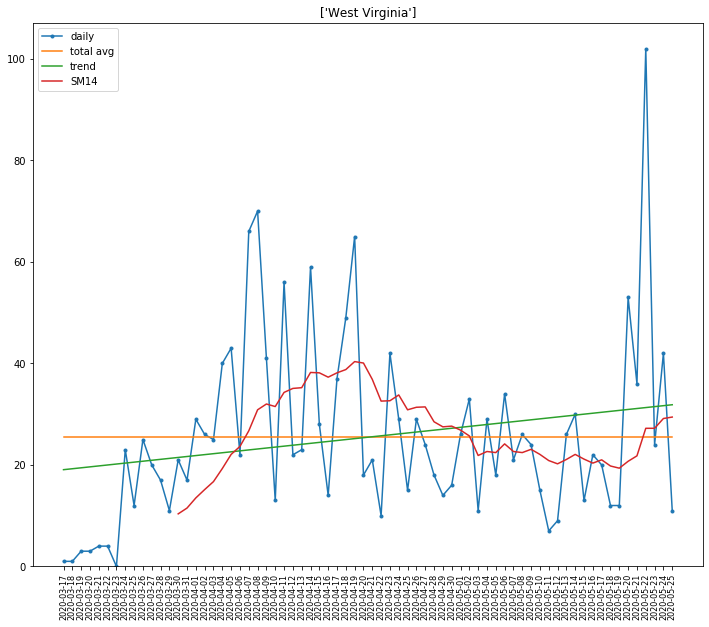

In [63]:
plot_daily(get_daily(get_this(data,state_name='West Virginia', county=False)),county=False)
plt.show()

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


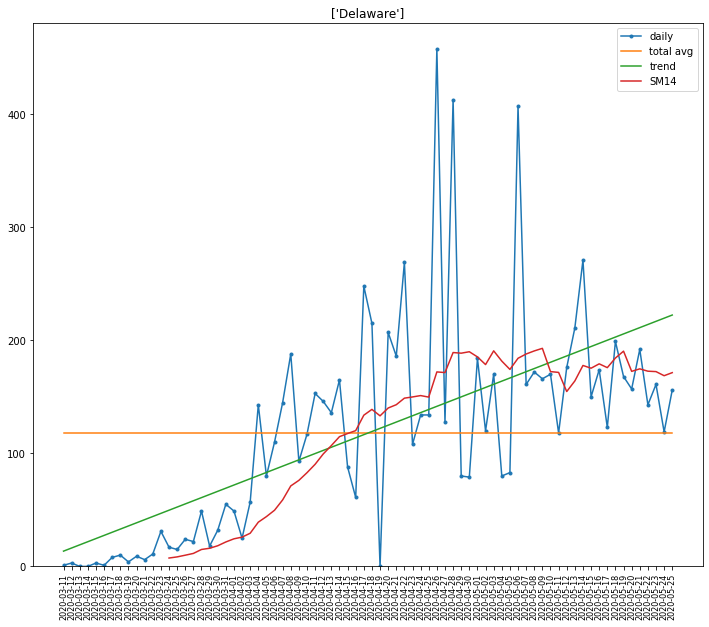

In [64]:
plot_daily(get_daily(get_this(data,state_name='Delaware', county=False)), county=False)

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0.11974425105990658 6.693219819510221 -196.52518992403026


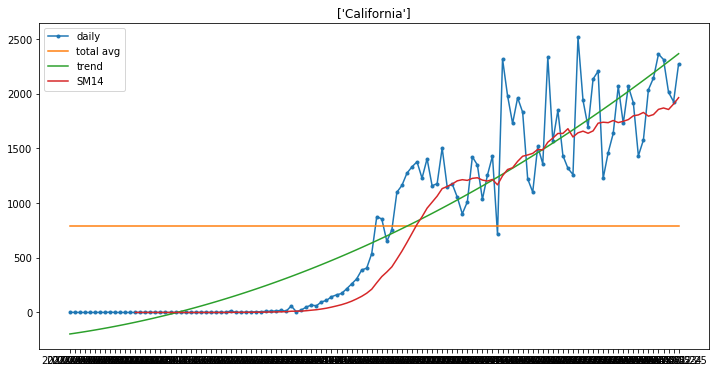

In [65]:
plot_daily_quad(get_daily(get_this(data,state_name='California', county=False)),county=False)

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


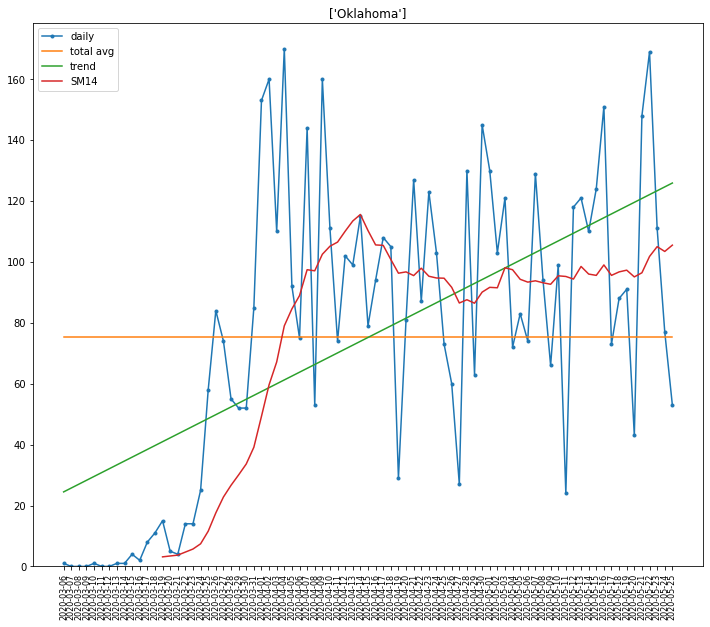

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
      ...  
76    148.0
77    169.0
78    111.0
79     77.0
80     53.0
Name: daily, Length: 81, dtype: float64

In [62]:
plot_daily(get_daily(get_this(data,state_name='Oklahoma', county=False)),county=False)
get_daily(get_this(data,state_name='Oklahoma', county=False)).daily

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


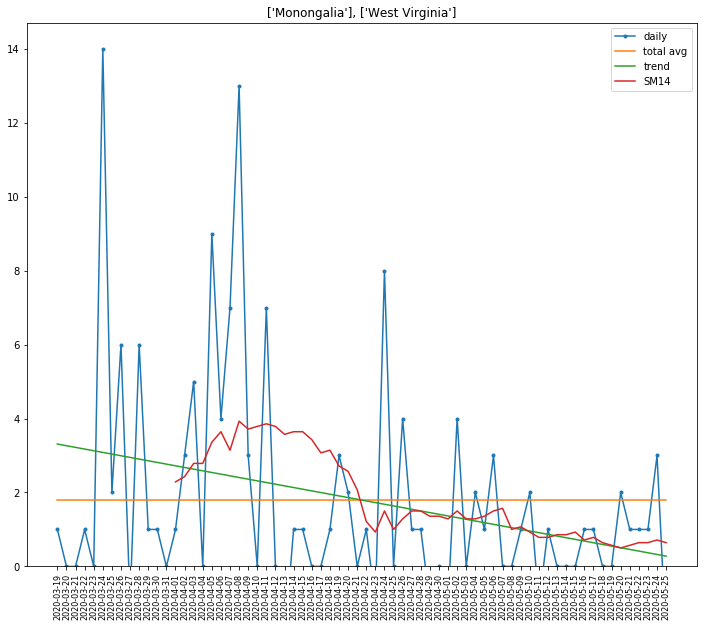

In [67]:
plot_daily(get_daily(get_this(data,state_name='West Virginia', county=True, county_name='Monongalia')),county=True)
